In [1]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 15}
matplotlib.rc('font', **font)

#time
from datetime import datetime, timedelta
import time

#matlab import
import scipy.io
from scipy.io import savemat

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

from nanodrivers.visa_drivers.vna import VNA
vna = VNA()
vna.idn()

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [33]:
vna.set_start_freq(3.5e9)
vna.set_stop_freq(4.5e9)
vna.set_nop(10001)
vna.set_band(10)

In [34]:
now = datetime.now()  

mag, pha = vna.get_data()
freq = vna.get_freq()
vna_dump = vna.dump()

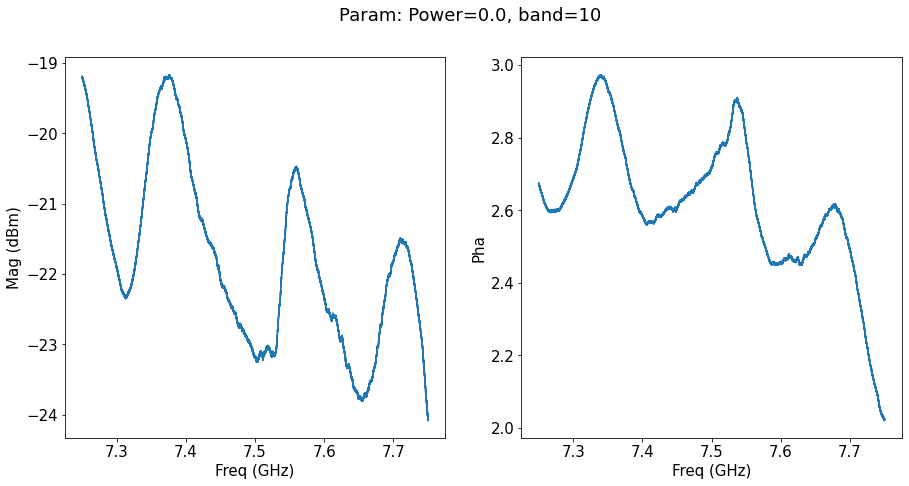

In [35]:
data_save_to = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\Cooldown23_01_24\10nm_test'

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Param: Power={}, band={}'.format(vna.power, vna.band))

ax[0].set_ylabel(r'Mag (dBm)')
ax[0].set_xlabel('Freq (GHz)')
ax[1].set_ylabel(r'Pha')
ax[1].set_xlabel('Freq (GHz)')

ax[0].plot(freq/1e9, mag)
ax[1].plot(freq/1e9, pha)
plt.savefig(data_save_to+"\\"+'vna_scan_' + now.strftime(r'%H-%M-%S') + '.PNG',  dpi=250, bbox_inches='tight')


state=dict()
state['date'] = now.strftime(r'%d.%m.%y %H-%M-%S')
state['sample_name'] = r'CoSi25 nm after warmup'
state['freq'] = vna.freq
state['mag'] = mag
state['pha'] = pha
state['power'] = vna.power
state['vna_dump'] = vna_dump
file_name = data_save_to +'\\' + 'vna_scan_' + now.strftime(r'%H-%M-%S') + '.mat'
savemat(file_name, state)

In [30]:
vna.dump()

{'device': 'TCPIPInstrument at TCPIP0::169.254.36.111::hislip0::INSTR',
 'type': 'LIN',
 'form': 0,
 'cent_freq': 4000000000.0,
 'span': 1000000000.0,
 'star_freq': 3500000000.0,
 'stop_freq': 4500000000.0,
 'cw_freq': nan,
 'freq': array([3.5000e+09, 3.5001e+09, 3.5002e+09, ..., 4.4998e+09, 4.4999e+09,
        4.5000e+09]),
 'nop': 100001,
 'elength': 13.531789,
 'status_output': 0,
 'band': 10,
 'power': 0.0,
 'avg_status': 0,
 'avgs': 1}

In [41]:
vna.query('SENSe1:ROSCillator:SOURce?')

'INT\n'